#  2. AS-AD Model
## 2.0 Model Setup

In [16]:
import numpy as np
import sympy as sm

In the given AS-AD model, the goods market equilibrium is:
$$ y_{t} = -\alpha r_{t} + v_{t} $$

The Central Banks Taylor rule is:
$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

And the ex ante real interest rate is:
$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Those can be combined you yield the AD-curve:
$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

The short-run aggregate supply curve (SRAS) is given as:
$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

And the inflation expectations are adaptive and given by:
$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

The inflation expectations and the SRAS can be combined to express the SRAS-curve as:
$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

We define all the symbols we will be using in sympy:

In [53]:
alpha = sm.symbols('alpha')
h= sm.symbols('h')
b= sm.symbols('b')
phi= sm.symbols('phi')
gamma= sm.symbols('gamma')
pit=sm.symbols('pi_t')
pi1t=sm.symbols('pi_t-1')
vt=sm.symbols('v_t')
yt=sm.symbols('y_t')
y1t=sm.symbols('y_t-1')
st=sm.symbols('s_t')
s1t=sm.symbols('s_t-1')
sm.init_printing(use_unicode=True) # Ensures the output is in math notation

The parameters of the model are:

In [54]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

## 2.1 Finding output and inflation values in the equilibrium

We define the AD-curve:

In [55]:
AD=(vt-(1+b*alpha)*yt)/(h*alpha)
AD

We define the SRAS

In [56]:
SRAS=pi1t+gamma*yt-phi*gamma*y1t+st-phi*s1t
SRAS

In [61]:
#First we set AD-curve and SRAS-curve equal
eq_AD_SRAS=sm.Eq(AD,SRAS)
eq_AD_SRAS

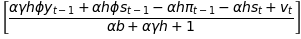

In [85]:

yt_eq=sm.solve(eq_AD_SRAS,yt)
yt_eq

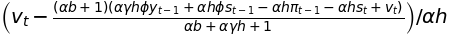

In [92]:
AD_sub=AD.subs({yt:yt_eq[0]})
AD_sub

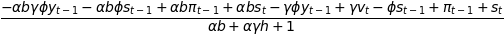

In [96]:
pit_eq=sm.simplify(AD_sub)
pit_eq

In [91]:
yt_par=yt_eq.subs({alpha:5.76,h:0.5,b:0.5,phi:0.5,gamma:0.075})
yt_par

AttributeError: 'list' object has no attribute 'subs'

## 2.3

## 2.4

## 2.5

## 2.6